In [50]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.discrete.discrete_model as smd
%matplotlib inline
"""import statsmodels.discrete.discrete_model.Probitでimportできないのはなぜ？"""

'import statsmodels.discrete.discrete_model.Probit\xe3\x81\xa7import\xe3\x81\xa7\xe3\x81\x8d\xe3\x81\xaa\xe3\x81\x84\xe3\x81\xae\xe3\x81\xaf\xe3\x81\xaa\xe3\x81\x9c\xef\xbc\x9f'

In [3]:
df = pd.read_table('punnoise_data.txt')

In [4]:
treat = df["treat"]

In [5]:
df_noise = df[df["noise"]==1]
df_nonoise = df[df["noise"]==0]

In [6]:
df_noise_nopun = df_noise[df_noise["punishment"]==0]
df_noise_reg = df_noise[df_noise["p_reg"]==1]
df_noise_str = df_noise[df_noise["p_strong"]==1]
df_nonoise_nopun = df_nonoise[df_nonoise["punishment"]==0]
df_nonoise_reg = df_nonoise[df_nonoise["p_reg"]==1]
df_nonoise_str = df_nonoise[df_nonoise["p_strong"]==1]

In [16]:
n1 = df_nonoise_nopun["group_id"].value_counts().count() *3
n2 = df_nonoise_reg["group_id"].value_counts().count() *3
n3 = df_nonoise_str["group_id"].value_counts().count() *3
n4 = df_noise_nopun["group_id"].value_counts().count() *3
n5 = df_noise_reg["group_id"].value_counts().count() *3
n6 = df_noise_str["group_id"].value_counts().count() *3

print(n1, n2, n3, n4, n5, n6)

(57, 57, 54, 57, 60, 54)


In [17]:
Avecon1 = df_nonoise_nopun["contribution"].sum()/df_nonoise_nopun["noise"].size
Avecon2 = df_nonoise_reg["contribution"].sum()/df_nonoise_reg["noise"].size
Avecon3 = df_nonoise_str["contribution"].sum() / df_nonoise_str["noise"].size
Avecon4 = df_noise_nopun["contribution"].sum()/df_noise_nopun["noise"].size
Avecon5 = df_noise_reg["contribution"].sum()/df_noise_reg["noise"].size
Avecon6 = df_noise_str["contribution"].sum()/df_noise_str["noise"].size

print (Avecon1, Avecon2, Avecon3, Avecon4, Avecon5, Avecon6)

(5.5929824561403505, 12.4, 17.607407407407408, 4.0350877192982457, 9.5999999999999996, 16.037037037037038)


In [18]:
Avepun2 = df_nonoise_reg["punishment_cost"].sum() / df_nonoise_nopun["noise"].size
Avepun3 = df_nonoise_str["punishment_cost"].sum() / df_nonoise_str["noise"].size
Avepun5 = df_noise_reg["punishment_cost"].sum() / df_noise_reg["noise"].size
Avepun6 = df_noise_str["punishment_cost"].sum() / df_noise_str["noise"].size

print(Avepun2, Avepun3, Avepun5, Avepun6)

(0.64000000000000001, 0.47925925925925927, 1.446, 0.64814814814814814)


In [19]:
Avepro1 = df_nonoise_nopun["income"].sum()/df_nonoise_nopun["noise"].size
Avepro2 = df_nonoise_reg["income"].sum()/df_nonoise_reg["noise"].size
Avepro3 = df_nonoise_str["income"].sum()/df_nonoise_str["noise"].size
Avepro4 = df_noise_nopun["income"].sum()/df_nonoise_nopun["noise"].size
Avepro5 = df_noise_reg["income"].sum()/df_noise_reg["noise"].size
Avepro6 = df_noise_str["income"].sum()/df_noise_str["noise"].size
print(Avepro1, Avepro2, Avepro3, Avepro4, Avepro5, Avepro6)

(22.796491228070174, 23.656140350877195, 25.448888888888888, 22.017543859649123, 19.103666666666665, 23.481481481481481)


In [43]:
grouped1 = df_nonoise_nopun.groupby("round")[["contribution"]]
grouped2 = df_nonoise_reg.groupby("round")[["contribution"]]
grouped3 = df_nonoise_str.groupby("round")[["contribution"]]
grouped4 = df_noise_nopun.groupby("round")[["contribution"]]
grouped5 = df_noise_reg.groupby("round")[["contribution"]]
grouped6 = df_noise_str.groupby("round")[["contribution"]]

In [92]:
groupedmean1 = grouped1.mean()
groupedmean2 = grouped2.mean()
groupedmean3 = grouped3.mean()
groupedmean4 = grouped4.mean()
groupedmean5 = grouped5.mean()
groupedmean6 = grouped6.mean()

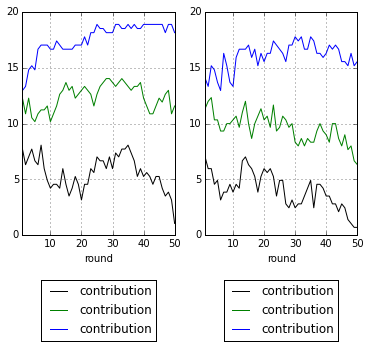

In [93]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey=ax1)
plt.subplots_adjust(wspace=0.2, hspace=0.11)
groupedmean1.plot(ax=ax1,color="k")
groupedmean2.plot(ax=ax1,color="g")
groupedmean3.plot(ax=ax1)
groupedmean4.plot(ax=ax2,color="k")
groupedmean5.plot(ax=ax2,color="g")
groupedmean6.plot(ax=ax2)

ax1.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))
ax2.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))

In [95]:
grouped_avepro1 = df_nonoise_nopun.groupby("round")[["income"]]
grouped_avepro2 = df_nonoise_reg.groupby("round")[["income"]]
grouped_avepro3 = df_nonoise_str.groupby("round")[["income"]]
grouped_avepro4 = df_noise_nopun.groupby("round")[["income"]]
grouped_avepro5 = df_noise_reg.groupby("round")[["income"]]
grouped_avepro6 = df_noise_str.groupby("round")[["income"]]
grouped_pro_mean1 = grouped_avepro1.mean()
grouped_pro_mean2 = grouped_avepro2.mean()
grouped_pro_mean3 = grouped_avepro3.mean()
grouped_pro_mean4 = grouped_avepro4.mean()
grouped_pro_mean5 = grouped_avepro5.mean()
grouped_pro_mean6 = grouped_avepro6.mean()

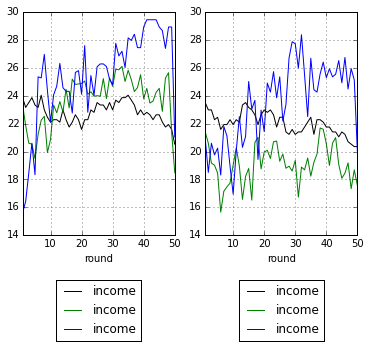

In [96]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey=ax1)
plt.subplots_adjust(wspace=0.2, hspace=0.11)
grouped_pro_mean1.plot(ax=ax1,color="k")
grouped_pro_mean2.plot(ax=ax1,color="g")
grouped_pro_mean3.plot(ax=ax1)
grouped_pro_mean4.plot(ax=ax2,color="k")
grouped_pro_mean5.plot(ax=ax2,color="g")
grouped_pro_mean6.plot(ax=ax2)

ax1.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))
ax2.legend(loc='lower center',bbox_to_anchor=(0.5,-0.5))

In [10]:
DD = df[["income","round","p_reg","p_strong",
         "noise","noise__p_reg","noise__p_strong"]]

In [12]:
"""http://necochan.com/2014/06/07/python-for-economist-6/から引用"""

'http://necochan.com/2014/06/07/python-for-economist-6/'

In [36]:
varlst=["income","round","p_reg","p_strong",
         "noise","noise__p_reg","noise__p_strong"]

In [ ]:
pd.scatter_matrix(DD[varlst], diagonal='kde')

In [37]:
def fml_build(varlst):
    varlst.reverse()
    fml=varlst.pop()+'~'
    while len(varlst)>0:
        fml=fml+'+'+varlst.pop()
    return fml
 
eq = fml_build(varlst)

In [38]:
eq

'income~+round+p_reg+p_strong+noise+noise__p_reg+noise__p_strong'

In [41]:
res = smf.ols(formula=eq, data=df).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     158.7
Date:                Tue, 06 Oct 2015   Prob (F-statistic):          6.51e-197
Time:                        14:15:13   Log-Likelihood:                -60859.
No. Observations:               16950   AIC:                         1.217e+05
Df Residuals:                   16943   BIC:                         1.218e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          21.5449      0.203    1

In [42]:
"""疑問点、R-squaredとadj.~が同じなのはなぜ？
interceptとは
p値がどれも低いがそれはデータと違う
95%conf.とint.とは
"""

'\xe7\x96\x91\xe5\x95\x8f\xe7\x82\xb9\xe3\x80\x81R-squared\xe3\x81\xa8adj.~\xe3\x81\x8c\xe5\x90\x8c\xe3\x81\x98\xe3\x81\xaa\xe3\x81\xae\xe3\x81\xaf\xe3\x81\xaa\xe3\x81\x9c\xef\xbc\x9f\nintercept\xe3\x81\xa8\xe3\x81\xaf\np\xe5\x80\xa4\xe3\x81\x8c\xe3\x81\xa9\xe3\x82\x8c\xe3\x82\x82\xe4\xbd\x8e\xe3\x81\x84\xe3\x81\x8c\xe3\x81\x9d\xe3\x82\x8c\xe3\x81\xaf\xe3\x83\x87\xe3\x83\xbc\xe3\x82\xbf\xe3\x81\xa8\xe9\x81\x95\xe3\x81\x86\n95%conf.\xe3\x81\xa8int.\xe3\x81\xa8\xe3\x81\xaf\n'

In [57]:
pro_res = smd.Probit(endog=["income","round","p_reg","p_strong","noise","noise__p_reg","noise__p_strong"],exog=DD)

ValueError: endog and exog matrices are different sizes